In [15]:
from scipy import *
from pylab import *
import numpy as np
from scipy.interpolate import interp1d
from IPython.display import Image

####################################################
### test plots for neutrino batch fiducial model ###
####################################################
#kcambhold, Pcambhold = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear-holdCMBconst_matterpow_99.dat').T

#kcamb, Pcamb = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_0.dat').T
#kcamb0, Pcamb0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_0.dat').T
k_arr = logspace(-2,1.5,100)
kcamb, Pcamb = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

khalofit, Phalofit = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_matterpow_0.dat').T
khalofit0, Phalofit0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-bird_matterpow_0.dat').T

khalofitT, PhalofitT = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_matterpow_0.dat').T
khalofitT0, PhalofitT0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-halofit_matterpow_0.dat').T

kgadget, Pgadget, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_050').T
kgadget0, Pgadget0, Nmodes0 = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_050').T


Pcamb0_interp = interp1d(kcamb0, Pcamb0)(k_arr)
Pcamb_interp =  interp1d(kcamb, Pcamb)(k_arr)
PT0_interp = interp1d(khalofitT0, PhalofitT0)(k_arr)
PT_interp = interp1d(khalofitT, PhalofitT)(k_arr)
PB0_interp = interp1d(khalofit0, Phalofit0)(k_arr)
PB_interp = interp1d(khalofit, Phalofit)(k_arr)

Boxsize=256.0
kgadget *= 2*pi/Boxsize
Pgadget *= Boxsize**3
Pgadget0 *= Boxsize**3
binsize=5
k0, k1 = kgadget[0::binsize][:-1], kgadget[binsize-1::binsize]
kgadget_bined =0.5*(k0+k1)

bin_array = lambda P, binsize, Nmodes:average(P [:-(len(P)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(P)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

Pgadget_bined = bin_array(Pgadget, binsize, Nmodes)
Pgadget0_bined = bin_array(Pgadget0, binsize, Nmodes)

k_trans, Ttot, Tnonu = loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7]]
ratio_nonu = interp1d(k_trans, (Tnonu/Ttot)**2)(k_arr)
Pnonu = Pcamb_interp*ratio_nonu

k_transT, TtotT, TnonuT = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_transfer_0.dat').T[[0,6,7]]
ratio_nonuT = interp1d(k_transT, (TnonuT/TtotT)**2)(k_arr)
PnonuT = Pcamb_interp*ratio_nonuT

k_transB, TtotB, TnonuB = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_transfer_0.dat').T[[0,6,7]]
ratio_nonuB = interp1d(k_transB, (TnonuB/TtotB)**2)(k_arr)
PnonuB = Pcamb_interp*ratio_nonuB

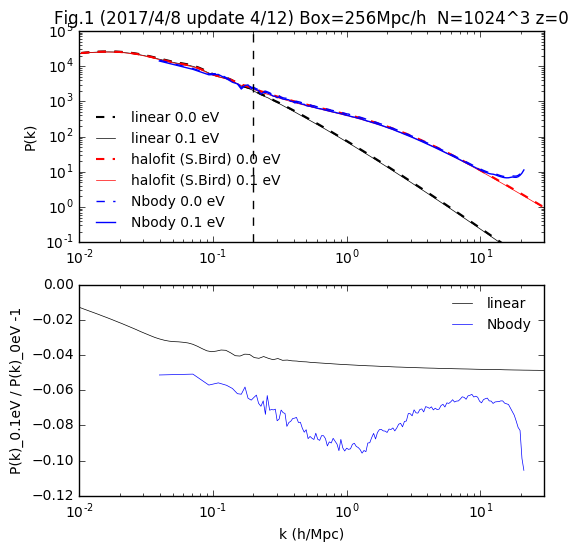

In [41]:
f=figure(figsize=(6,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5,label='linear 0.0 eV')
ax.plot(kcamb, Pcamb, 'k-',lw=0.5,label='linear 0.1 eV')

ax.plot(khalofit0, Phalofit0, 'r--',lw=1.5,label='halofit (S.Bird) 0.0 eV')
ax.plot(khalofit, Phalofit, 'r-',lw=0.5, label='halofit (S.Bird) 0.1 eV')

ax.plot(kgadget_bined, Pgadget0_bined, 'b--', lw=1,label='Nbody 0.0 eV')
ax.plot(kgadget_bined, Pgadget_bined, 'b-', lw=1,label='Nbody 0.1 eV')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
#ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.1 (2017/4/8 update 4/12) Box=256Mpc/h  N=1024^3 z=0')
ax.legend(frameon=0,loc=3,fontsize=10)

ax2.plot(k_arr,Pnonu/Pcamb0_interp-1,'k-',lw=0.5, label='linear')
#ax2.plot(k_arr,PnonuB/PB0_interp-1,'r-',lw=0.5, label='halofit (S. Bird)')
#ax2.plot(k_arr,PnonuT/PT0_interp-1,'c-',lw=0.5, label='halofit (Takahashi)')
ax2.plot(kgadget_bined,Pgadget_bined/Pgadget0_bined-1,'b-',lw=0.5, label='Nbody')

ax2.legend(frameon=0,fontsize=10)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
#ax2.set_ylim(-0.12,0.03)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_0.1eV / P(k)_0eV -1')
show()

######## note on some test results:
######## the lower power is due to nu mass splitting
######## nor it's due to the definition in omega_m = 1-omega_lambda

# Fig.4 in Ali-Haimoud & Bird 2013

(1) I donnot see an excess of power around k=0.1 in Fig.1 above

(2) I donnot see the artefact/spike at k=7

(3) I see a larger suppression of power than other halofit models

(4) FYI, current resolution 1024^3 and 256 Mpc/h, below plot maybe 512^3+256Mpc/h?

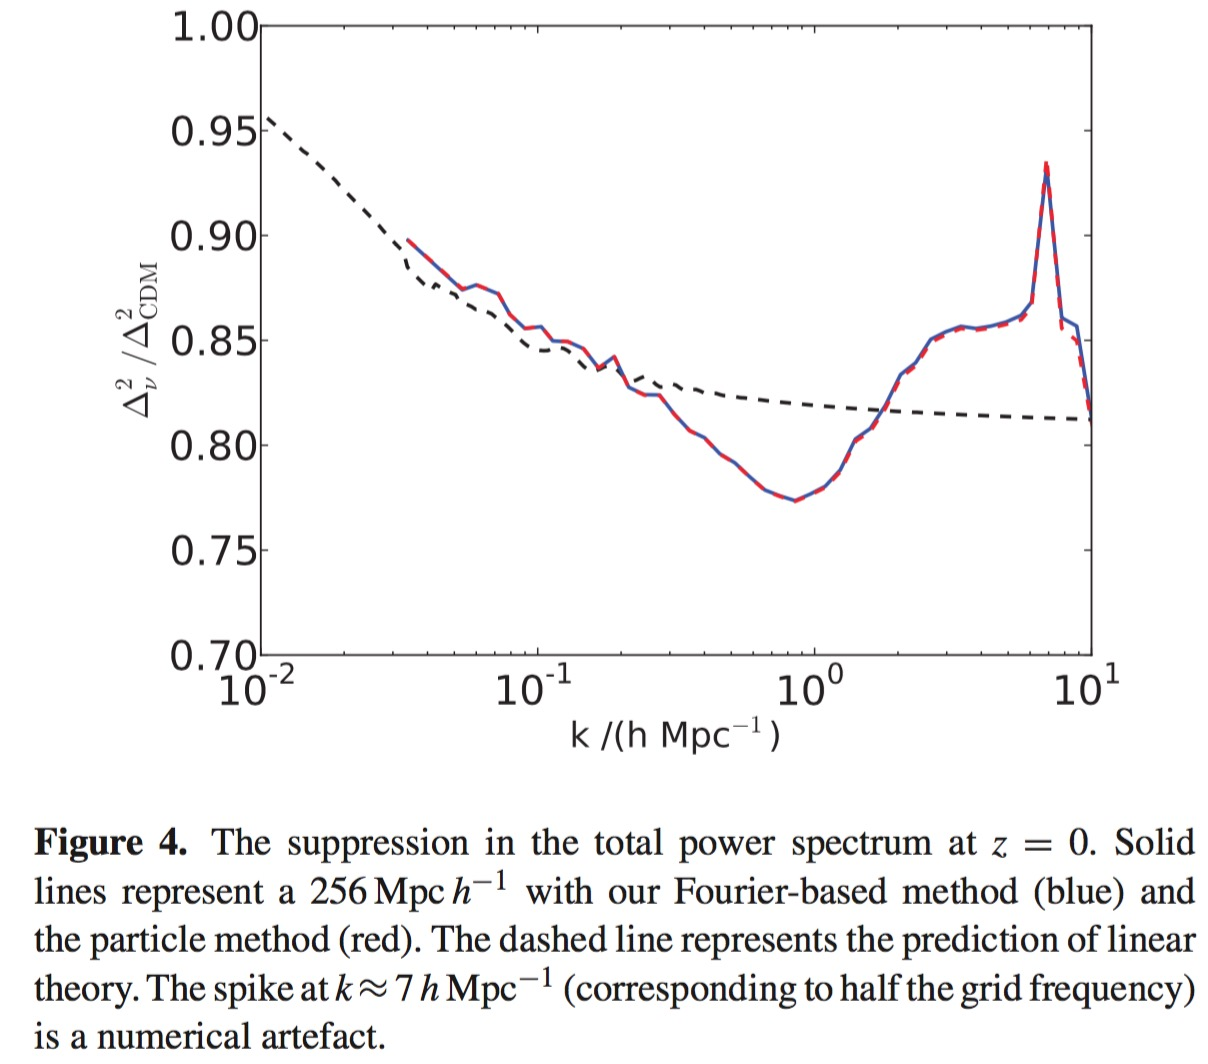

In [3]:
Image("plots/AB13fig4.jpg",width=450)

In [42]:
############ check IC and higher redshift snapshots ##########
#kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_99.dat').T
kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb0_z3, Pcamb0_z3 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_3.dat').T

#kcamb_z99, Pcamb_z99 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_99.dat').T
kcamb_z99, Pcamb_z99 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb_z3, Pcamb_z3 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T

kgadget_z99, Pgadget_z99, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-ICs').T
kgadget_z3, Pgadget_z3, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_000').T

kgadget0_z99, Pgadget0_z99, Nmodes = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-ICs').T
kgadget0_z3, Pgadget0_z3, Nmodes = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_000').T


kgadget_512Mpc, Pgadget_z99_512Mpc, Nmodes_512Mpc = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-ICs-512Mpc').T
kgadget0_512Mpc, Pgadget0_z99_512Mpc, Nmodes_512Mpc = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-ICs-512Mpc').T


#Boxsize=256.0
kgadget_z3 *= 2*pi/Boxsize
Pgadget0_z3 *= Boxsize**3
Pgadget0_z99 *= Boxsize**3
Pgadget_z3 *= Boxsize**3
Pgadget_z99 *= Boxsize**3

kgadget_512Mpc *= 2*pi/(Boxsize*2)
Pgadget_z99_512Mpc *= (Boxsize*2)**3
Pgadget0_z99_512Mpc *= (Boxsize*2)**3


k0b, k1b = kgadget_512Mpc[0::binsize][:-1], kgadget_512Mpc[binsize-1::binsize]
kgadget_512Mpc_bined =0.5*(k0b+k1b)

Pgadget_z3_bined = bin_array(Pgadget_z3, binsize, Nmodes)
Pgadget0_z3_bined = bin_array(Pgadget0_z3, binsize, Nmodes)

Pgadget_z99_bined = bin_array(Pgadget_z99, binsize, Nmodes)
Pgadget0_z99_bined = bin_array(Pgadget0_z99, binsize, Nmodes)

Pgadget_z99_512Mpc_bined = bin_array(Pgadget_z99_512Mpc, binsize, Nmodes)
Pgadget0_z99_512Mpc_bined = bin_array(Pgadget_z99_512Mpc, binsize, Nmodes)

########################
k_trans99, Ttot99, Tnonu99 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_99.dat').T[[0,6,7]]
ratio_nonu99 = interp1d(k_trans99, (Tnonu99/Ttot99)**2)(kgadget_bined)
ratio_nonu99_512Mpc = interp1d(k_trans99, (Tnonu99/Ttot99)**2)(kgadget_512Mpc_bined)

k_trans3, Ttot3, Tnonu3 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_3.dat').T[[0,6,7]]
ratio_nonu3 = interp1d(k_trans3, (Tnonu3/Ttot3)**2)(kgadget_bined)

#########################
P0_z99_out = interp1d(kcamb0_z99, Pcamb0_z99)(kgadget_bined)
P0_z3_out = interp1d(kcamb0_z3, Pcamb0_z3)(kgadget_bined)

P_z99_out = interp1d(kcamb_z99, Pcamb_z99)(kgadget_bined)
P_z3_out = interp1d(kcamb_z3, Pcamb_z3)(kgadget_bined)

P0_z99_512Mpc_out = interp1d(kcamb0_z99, Pcamb0_z99)(kgadget_512Mpc_bined)
P_z99_512Mpc_out = interp1d(kcamb_z99, Pcamb_z99)(kgadget_512Mpc_bined)

correct_nonu=1
if correct_nonu:
    P_z99_out *= ratio_nonu99
    P_z3_out *= ratio_nonu3
    P_z99_512Mpc_out *=ratio_nonu99_512Mpc

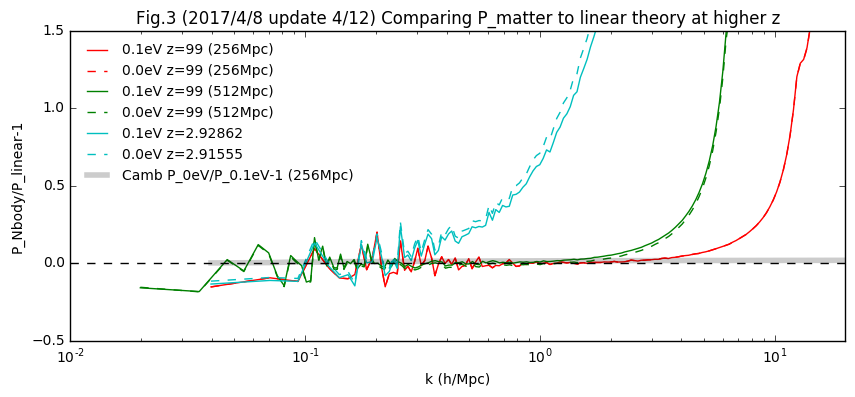

In [43]:
f=figure(figsize=(10,4))
ax=f.add_subplot(111)
#ax2=f.add_subplot(121)


ax.plot(kgadget_bined, Pgadget_z99_bined/P_z99_out-1,'r-',label='0.1eV z=99 (256Mpc)')
ax.plot(kgadget_bined, Pgadget0_z99_bined/P0_z99_out-1,'r--',label='0.0eV z=99 (256Mpc)')

ax.plot(kgadget_512Mpc_bined, Pgadget_z99_512Mpc_bined/P_z99_512Mpc_out-1,'g-',label='0.1eV z=99 (512Mpc)')
ax.plot(kgadget_512Mpc_bined, Pgadget0_z99_512Mpc_bined/P0_z99_512Mpc_out-1,'g--',label='0.0eV z=99 (512Mpc)')

ax.plot(kgadget_bined, Pgadget_z3_bined/P_z3_out-1,'c-',label='0.1eV z=2.92862')
ax.plot(kgadget_bined, Pgadget0_z3_bined/P0_z3_out-1,'c--',label='0.0eV z=2.91555')

ax.plot(kgadget_bined, P0_z99_out/P_z99_out-1,'k-', lw=4, alpha=0.2, label='Camb P_0eV/P_0.1eV-1 (256Mpc)')
ax.legend(fontsize=10,frameon=0,loc=0, ncol=1)
ax.plot([1e-2, 20],[0,0],'k--')
ax.set_xlabel('k (h/Mpc)')
ax.set_xscale('log')
ax.set_ylabel('P_Nbody/P_linear-1')


ax.set_xlim(1e-2,20)
ax.set_ylim(-0.5,1.5)
ax.set_title("Fig.3 (2017/4/8 update 4/12) Comparing P_matter to linear theory at higher z")
show()

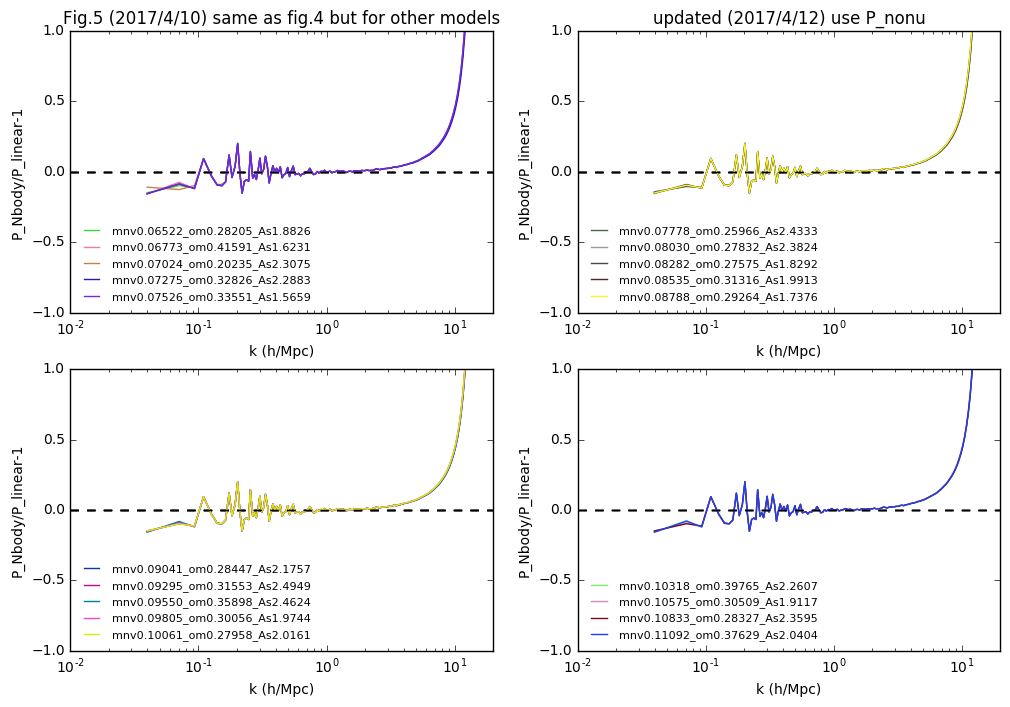

In [40]:
################################################
##### plot pmatter for other cosmology #########
################################################
import os
fn_arr = np.array(os.listdir('matterpower'))[where(array( [(len(iPm)) for iPm in os.listdir('matterpower')])==39)[0]]
#print fn_arr
fn_arr = delete(fn_arr, 1)

f=figure(figsize=(12,8))
jjj=0
seed(5)
for iii in range(len(fn_arr)):

    fn = fn_arr[iii][:-10]
    #print fn
    if fn[:10]=='mnv0.00000' or fn[:10]=='mnv0.10000':
        continue
    if jjj%5==0:
        ax=f.add_subplot(2,2,jjj/5+1)
    if iii==2:    
        ax.set_title("Fig.5 (2017/4/10) same as fig.4 but for other models")
    if jjj==8:
        ax.set_title("updated (2017/4/12) use P_nonu")
    ikgadget, iPgadget, iNmodes = np.loadtxt('matterpower/%s-PK-DM-ICs'%(fn)).T
    
    ikT_z99, iTtot, iTnonu = np.loadtxt('camb/camb_%s_transfer_99.dat'%(fn)).T[[0,6,7]]
    iratio = interp1d(ikT_z99, (iTnonu/iTtot)**2)(kgadget_bined) 
    
    ikcamb_z99, iPcamb_z99 = np.loadtxt('camb/camb_%s_matterpow_99.dat'%(fn)).T
  
    kgadget *= 2*pi/Boxsize
    iPgadget *= Boxsize**3
    iPgadget_binned = bin_array(iPgadget,binsize,iNmodes)
    P_z99_out = iratio*interp1d(ikcamb_z99, iPcamb_z99)(kgadget_bined)
    
    
    icolor=rand(3)
    ax.plot(kgadget_bined, iPgadget_binned/P_z99_out-1, c=icolor, label=fn)
    jjj+=1
    ax.legend(fontsize=8,frameon=0,loc=3, ncol=1)
    ax.plot([1e-2, 20],[0,0],'k--')
    ax.set_xlabel('k (h/Mpc)')
    ax.set_xscale('log')
    ax.set_ylabel('P_Nbody/P_linear-1')    
    ax.set_xlim(1e-2,20)
    ax.set_ylim(-1,1)
show()

# Conclusions for now (2017/4/10):

(1) The relative difference in IC P_matter between any 2 massive nu models is consistent with camb (fig.7);

(2) ICs of massive nu have systematically higher P_matter than the massless model (fig.3);

(3) The suppresion due to neutrinos can have ~ 1% difference at linear scales, compared to camb prediction (fig.6).